                       y1        y2
t                                  
0 days 00:00:00  0.000000  0.000000
0 days 00:00:01  0.688938  0.673624
0 days 00:00:02  0.609520 -0.415342
0 days 00:00:03       NaN -0.113602
0 days 00:00:04 -0.340053  0.297989
0 days 00:00:05 -0.352769 -0.121388
0 days 00:00:06 -0.084158 -0.088695
0 days 00:00:07  0.162011  0.121306
0 days 00:00:08  0.199748 -0.026118
0 days 00:00:09  0.068123 -0.050470
0 days 00:00:10 -0.073625  0.045453


<Axes: xlabel='t'>

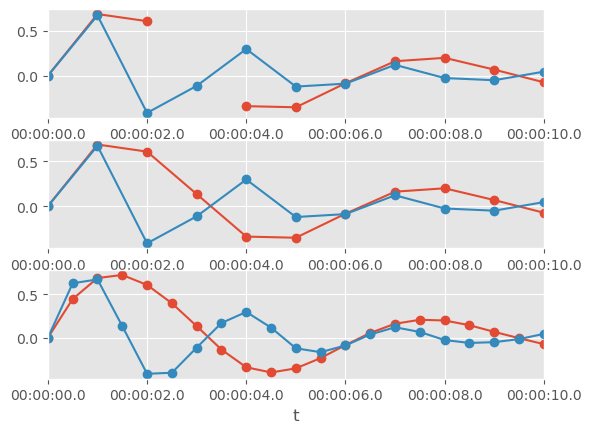

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


def make_fake_data():

    t = np.linspace(0, 10, 11)
    y1 = np.sin(t)*np.exp(-.2*t)
    y2 = np.sin(2*t)*np.exp(-.3*t)
    y1[3] = np.nan
    df = pd.DataFrame(index = pd.to_timedelta(t, 'S'))
    df.index.name = 't'
    df['y1'] = y1
    df['y2'] = y2
    print(df)
    return df

df = make_fake_data()

fig, ax = plt.subplots(3,1)

df.plot(marker = 'o', ax = ax[0], legend = None)

df = df.interpolate(method='linear')
df.plot(marker = 'o', ax = ax[1], legend = None)

df = df.resample('0.5S').interpolate(method='polynomial', order = 2)
df.plot(marker = 'o', ax = ax[2], legend = None)





In [4]:
df.agg(['sum', 'min'])


,y1,y2
sum,2.216074,0.834503
min,-0.400127,-0.415342
